In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#plt.savefig('testfig.svg', format='svg')

Question 1 (15 points): Read in the data from the given CSV file. Down-select to create a
dataframe that only includes three columns (sport, height, and weight) for all of the males
who competed in either basketball or cycling, then perform dropna() to remove any missing
rows. This should result in a dataframe with 3 columns and 450 rows. Convert the nonnumerical feature (sport) to numerical values. Further, convert the height values from meters
to centimeters. Include in your report a brief description (1-2 sentences) of why it might be
a good idea to use the data in centimeters rather than meters for k-nearest neighbors.

In [28]:
# Read in CSV here
athletes_data = pd.read_csv("all-rio-2016-athletes-excel.csv")
#print(athletes_data.columns)

athletes_data = athletes_data[ (athletes_data['sport'] == "basketball") | (athletes_data['sport'] == "cycling")]
athletes_data = athletes_data.loc[athletes_data["sex"] == "male"]

athletes_data = athletes_data.loc[:, ["sport", "height (m)", "weight (kg)"]]
athletes_data = athletes_data.dropna()
#print(athletes_data.columns) - prints 3 columns (sport, height, weight)
#print(athletes_data.size)  - prints 1350 (3 cols x 450 rows)

#Convert nonnumerical feature (sport) to numerical values
sport_num = []
for sport in athletes_data["sport"]:
    if sport == "basketball":
        sport_num.append(0)
    else:
        sport_num.append(1)
athletes_data["sport"] = sport_num

#Convert height meters to centimeters
athletes_data["height (m)"] *= 100
athletes_data = athletes_data.rename(columns={"height (m)": "height (cm)"})

Question 2 (15 points): For each class (basketball, cycling) and feature (height, weight),
compute the following statistics: minimum, maximum, mean, standard deviation, and signalto-noise ratio (SNR = mean/standard deviation). Create a table that shows the statistics
for each class and feature. Do any of the statistics give rise to concern? Provide a brief
description (1-2 sentences) in the report.

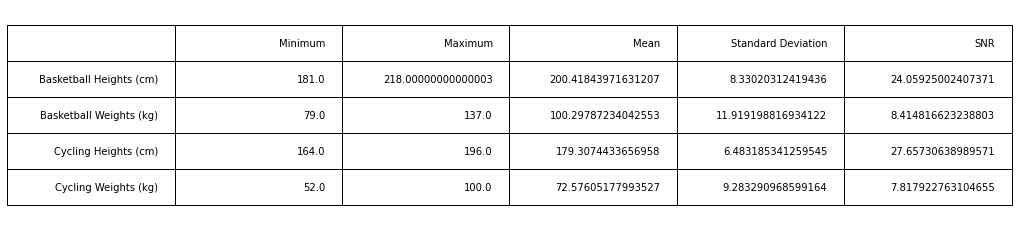

In [35]:
table_info = [["", "Minimum", "Maximum", "Mean", "Standard Deviation", "SNR"]]

basketball_data = athletes_data.loc[athletes_data["sport"] == 0]
basketball_height = np.array(basketball_data["height (cm)"])
table_info.append(["Basketball Heights (cm)", np.min(basketball_height), np.max(basketball_height), np.mean(basketball_height), np.std(basketball_height), np.mean(basketball_height)/ np.std(basketball_height)])
basketball_weight = np.array(basketball_data["weight (kg)"])
table_info.append(["Basketball Weights (kg)", np.min(basketball_weight), np.max(basketball_weight), np.mean(basketball_weight), np.std(basketball_weight), np.mean(basketball_weight)/ np.std(basketball_weight)])

cycling_data = athletes_data.loc[athletes_data["sport"] == 1]
cycling_height = np.array(cycling_data["height (cm)"])
table_info.append(["Cycling Heights (cm)", np.min(cycling_height), np.max(cycling_height), np.mean(cycling_height), np.std(cycling_height), np.mean(cycling_height)/ np.std(cycling_height)])
cycling_weight = np.array(cycling_data["weight (kg)"])
table_info.append(["Cycling Weights (kg)", np.min(cycling_weight), np.max(cycling_weight), np.mean(cycling_weight), np.std(cycling_weight), np.mean(cycling_weight)/ np.std(cycling_weight)])

current_table = plt.table(table_info, loc='center')
current_table.scale(3.0, 3.0)
plt.axis('off')
plt.show()

Question 3 (5 points): Divide the data into training and test data using the standard 80-20
ratio. Apply 10-fold cross-validation to the training data.

In [40]:
X = np.c_[athletes_data["height (cm)"], athletes_data["weight (kg)"]]
y = np.array(sport_num)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

from sklearn.model_selection import KFold
splits = KFold(n_splits=10)

Question 4 (10 points): Create a scatter plot of the training data, where you color the
basketball data and cycling data differently. Make sure to label your axes and include a
legend for the labels. Does the scatter plot indicate potential success or failure with respect
to separating the two classes using KNN? Why? Provide a brief description (1-2 sentences)
in the report.

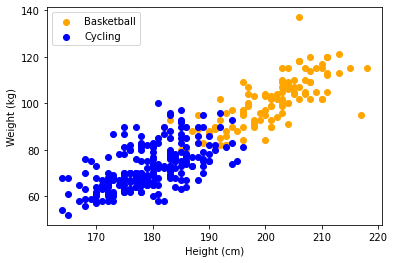

In [48]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='orange')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='blue')
plt.legend(labels=["Basketball", "Cycling"])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

Question 5 (25 points): Create and iterate over different numbers of neighbors from 1 to 21
(inclusive, but odd numbers only). For each hyperparameter, calculate the mean and standard deviation of classification accuracy across the different folds of the data. Create a table
for your report showing the mean and standard deviation for each hyperparameter. Select
which hyperparameter to use based on the mean classification accuracy on the validation
data. Note which hyperparameter value is selected in the report.


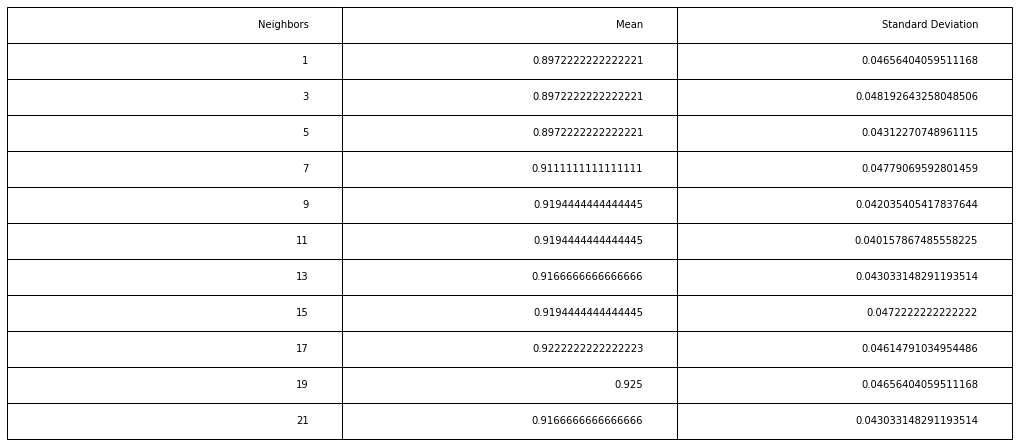

In [52]:
table_info = [["Neighbors", "Mean", "Standard Deviation"]]

for k in range(1,22,2):
    scores = []
    for train_index, val_index in splits.split(X_train):
        X_subtrain = X_train[train_index]
        X_val = X_train[val_index]
        y_subtrain = y_train[train_index]
        y_val = y_train[val_index]
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_subtrain, y_subtrain)
        y_predict = clf.predict(X_val)
        scores.append(accuracy_score(y_val,y_predict))
    table_info.append([k, np.mean(scores), np.std(scores)])

the_table = plt.table(table_info, loc='center')
the_table.scale(3.0, 3.0)
plt.axis('off')
plt.show()


Question 6 (10 points): ): Build a new K-nearest neighbor classifier using all your training
data with the hyperparameter defined in Question 5. Use the resulting model to classify the
test data (which haven’t used until now). Calculate and report overall training and test data
performance.


In [53]:
clf = KNeighborsClassifier(n_neighbors=19)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
print("Training: ", accuracy_score(y_train, y_predict))
y_predict = clf.predict(X_test)
print("Testing: ", accuracy_score(y_test, y_predict))

Training:  0.9277777777777778
Testing:  0.9777777777777777


Question 7 (20 points): Create a 2D plot that visualizes the classifier’s performance (a
decision boundary). Run a mesh of data through the classifier to determine basketball and
cycling decision regions. Color them two different light colors (alpha=0.2) that are easy to
visually separate. Then, overlay the test data using two different colors for basketball and
cycling. Make sure all plots are labeled and that a legend is included.

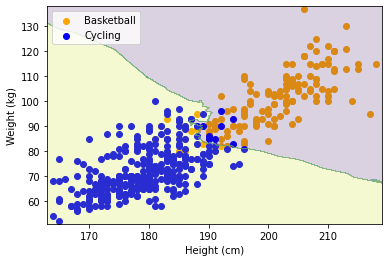

In [58]:
x_min = np.min(X[:,0]) - 1
x_max = np.max(X[:,0]) + 1
y_min = np.min(X[:,1]) - 1
y_max = np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

new_X = np.c_[xx.ravel(), yy.ravel()]
new_y = clf.predict(new_X)
zz = new_y.reshape(xx.shape)

plt.scatter(basketball_data["height (cm)"], basketball_data["weight (kg)"], c='orange')
plt.scatter(cycling_data["height (cm)"], cycling_data["weight (kg)"], c='blue')
plt.legend(labels = ["Basketball", "Cycling"])
plt.contourf(xx, yy, zz, alpha=0.2)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()